In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
# Рисуем графики не создавая новых окон
%matplotlib inline

In [3]:
import numpy as np
def generateSimpleBuckleyOsthusGraph(a, n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        # вероятности для концов ребер
        probabilities = [
            (a - 1 + nx.degree(G, i)) / ((a + 1.0) * new_node + a )
            for i in xrange(new_node)
        ]
        # вероятность петли
        probabilities += [float(a)/ ((a + 1.0) * new_node + a)]
        destination = np.random.choice(G.nodes(), 1, p=probabilities)[0]
        G.add_edge(new_node, destination)
    return G

def generateBuckleyOsthusGraph(a, n, m):
    G1mn = generateSimpleBuckleyOsthusGraph(a, m * n)
    G = nx.MultiDiGraph()
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G


In [5]:
from scipy import special
def beta(a, m, d):
    return special.beta(d - m + a * m, a + 2) / special.beta(m * a, a + 1)

In [6]:
n = 5000
a = 0.3
m = 2
G = generateBuckleyOsthusGraph(a, n, m)

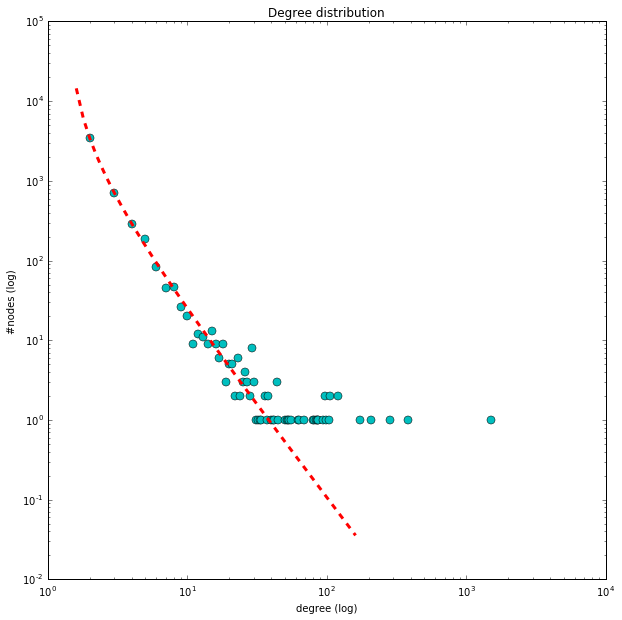

In [10]:
from collections import Counter
pylab.rcParams['figure.figsize'] = 10, 10
# распределение вершин
degrees = Counter(nx.degree(G).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]

# теоретическая оценка
degree_values = np.arange(1, max(G.degree().values()) + 1, 0.2)
degree_values = degree_values[:800]
theoretical_values = [beta(a, m, d) * n for d in degree_values]

plt.loglog(sorted_degree_values, counts, ls='None', 
           marker='o', markersize=8, color='c')
plt.loglog(degree_values, theoretical_values, color='r', ls='--', lw=3)
plt.title("Degree distribution")
plt.ylabel("#nodes (log)")
plt.xlabel("degree (log)")
plt.show()